In [ ]:
####In this investigation, I am going to work with the advertising data marketing. 
###I am going try to predict what specific user would click on an advertisement.


In [70]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [71]:
##here we call the dataset, and we see the 10 first row in the dataset

df = pd.read_csv("advertising_ef.csv")
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0
5,59.99,23.0,59761.56,226.74,Sharable client-driven software,NaN,Male,Norway,19-05-2016 14:30,0
6,88.91,33.0,53852.85,208.36,Enhanced dedicated support,Brandonstad,Female,Myanmar,28-01-2016 20:59,0
7,NaN,48.0,24593.33,131.76,Reactive local challenge,Port Jefferybury,Male,Australia,07-03-2016 01:40,1
8,74.53,30.0,NaN,221.51,Configurable coherent function,West Colin,Male,Grenada,18-04-2016 09:33,0
9,69.88,20.0,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,Male,Ghana,11-07-2016 01:42,0


In [72]:
##lets looks for all the numbers and the datatype of this dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      998 non-null    object 
 6   Gender                    1009 non-null   object 
 7   Country                   996 non-null    object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


In [73]:
##lets look for missing information

df.isnull().sum()

Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [74]:
# Replace the missing data in "Daily Time Spent on Site", "Age", "Area Income" and "Daily Internet Usage"  
## with the average of them 

print(df["Daily Time Spent on Site"].mean())

df["Daily Time Spent on Site"].fillna(65.00946268656728, inplace = True)

65.00946268656728


In [75]:
print(df["Age"].mean())

df["Age"].fillna(35.96292585170341, inplace = True)

35.96292585170341


In [76]:
print(df["Area Income"].mean())

df["Area Income"].fillna(54958.573617234484, inplace = True)

54958.573617234484


In [77]:
print(df["Daily Internet Usage"].mean())

df["Daily Internet Usage"].fillna(180.04192039801, inplace = True)

180.04192039801


In [78]:
## there is a few more missing information, so I procceded to remove them

## Remove the rows in the dataset "City" that has missing  data.


df.dropna(subset=["City"], inplace = True)

In [79]:
## Remove the rows in the dataset "Country" that has missing  data.

df.dropna(subset=["Country"], inplace = True)

In [80]:
# Recheck is there is any missing data in the dataset.

df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [81]:
## removing unnecessary column in the dataset

df.drop(columns=["Timestamp"], inplace = True)



In [82]:
## I decided to remove the column which I think Its not necessary

df.drop(columns=["City"], inplace = True)

In [83]:
## Replacing the value (0,1) to "clicked" and " did not clicked" on the column "Clicked on Ad"

df["Clicked on Ad"].replace([0, 1], ["Did Not Click", "Clicked"], inplace = True)

In [84]:
## Double checking the dataset

df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Gender,Country,Clicked on Ad
0,68.950000,35.0,61833.900000,256.09,Cloned 5thgeneration orchestration,Female,Tunisia,Did Not Click
1,65.009463,31.0,68441.850000,193.77,Monitored national standardization,Male,Nauru,Did Not Click
2,69.470000,26.0,59785.940000,236.50,Organic bottom-line service-desk,Female,San Marino,Did Not Click
3,74.150000,29.0,54806.180000,245.89,Triple-buffered reciprocal time-frame,Male,Italy,Did Not Click
4,68.370000,35.0,73889.990000,225.58,Robust logistical utilization,Female,Iceland,Did Not Click
6,88.910000,33.0,53852.850000,208.36,Enhanced dedicated support,Female,Myanmar,Did Not Click
7,65.009463,48.0,24593.330000,131.76,Reactive local challenge,Male,Australia,Clicked
8,74.530000,30.0,54958.573617,221.51,Configurable coherent function,Male,Grenada,Did Not Click
9,69.880000,20.0,55642.320000,183.82,Mandatory homogeneous architecture,Male,Ghana,Did Not Click
10,47.640000,49.0,45632.510000,122.02,Centralized neutral neural-net,Female,Qatar,Clicked


In [85]:
## Creating a column called "Age Group" to group Users by their age 
## (create 4 categories: (teen, young adult, adult, senior)

## teen = 13.1 - 18
## young adult = 18.1 - 30
## adult = 30.1 - 65
## senior = 65+

bins = [13, 21, 30, 60, 150]
bin_names = ["Young (13 - 20)", "Young adult (21 - 29)", "Adult (30 - 59)", "Senior (60 +)"]

df["Age Group"] = pd.cut(df["Age"], bins, labels=bin_names)



In [86]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Gender,Country,Clicked on Ad,Age Group
0,68.950000,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Female,Tunisia,Did Not Click,Adult (30 - 59)
1,65.009463,31.0,68441.85,193.77,Monitored national standardization,Male,Nauru,Did Not Click,Adult (30 - 59)
2,69.470000,26.0,59785.94,236.50,Organic bottom-line service-desk,Female,San Marino,Did Not Click,Young adult (21 - 29)
3,74.150000,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,Male,Italy,Did Not Click,Young adult (21 - 29)
4,68.370000,35.0,73889.99,225.58,Robust logistical utilization,Female,Iceland,Did Not Click,Adult (30 - 59)


In [87]:
## Now I need to determine the frecquencies

df[["Age"]].value_counts()

Age      
31.000000    58
36.000000    50
28.000000    48
29.000000    47
33.000000    43
34.000000    40
32.000000    37
30.000000    37
35.000000    37
26.000000    36
38.000000    35
40.000000    34
37.000000    33
27.000000    32
41.000000    31
39.000000    30
45.000000    29
25.000000    25
42.000000    25
43.000000    23
24.000000    21
44.000000    21
50.000000    20
23.000000    18
49.000000    18
46.000000    18
48.000000    16
52.000000    14
22.000000    13
47.000000    12
51.000000    12
35.962926    11
53.000000    10
54.000000     9
55.000000     7
19.000000     6
20.000000     6
21.000000     5
57.000000     5
58.000000     4
60.000000     4
56.000000     2
59.000000     2
61.000000     1
dtype: int64

In [88]:
df[["Gender"]].value_counts()

Gender
Female    514
Male      471
dtype: int64

In [89]:
df[["Clicked on Ad"]].value_counts()

Clicked on Ad
Clicked          499
Did Not Click    486
dtype: int64

In [90]:
df[["Country"]].value_counts()

Country              
France                   9
Czech Republic           9
Afghanistan              8
Australia                8
Turkey                   8
                        ..
Mozambique               1
Norway                   1
Romania                  1
Saint Kitts and Nevis    1
Aruba                    1
Length: 237, dtype: int64

In [91]:
df[["Area Income"]].value_counts()

Area Income 
54958.573617    11
51257.260000     2
29875.800000     2
47338.940000     2
40763.130000     2
                ..
51013.370000     1
51015.110000     1
51049.470000     1
51067.540000     1
79484.800000     1
Length: 971, dtype: int64

In [92]:
## Determining the: 

## Mean
## Median
## Mode
## Standard Deviation
## Range

## of the dataset

df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,985.000000,985.000000,985.000000,985.000000
mean,64.950769,36.028012,54903.509787,179.657043
std,15.854897,8.736386,13318.279707,43.877146
min,32.600000,19.000000,13996.500000,104.780000
25%,51.300000,29.000000,46974.150000,138.680000
50%,68.010000,35.000000,56735.830000,181.250000
75%,78.540000,42.000000,65227.790000,218.170000
max,91.430000,61.000000,79484.800000,269.960000


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Daily Time Spent on Site  985 non-null    float64 
 1   Age                       985 non-null    float64 
 2   Area Income               985 non-null    float64 
 3   Daily Internet Usage      985 non-null    float64 
 4   Ad Topic Line             985 non-null    object  
 5   Gender                    985 non-null    object  
 6   Country                   985 non-null    object  
 7   Clicked on Ad             985 non-null    object  
 8   Age Group                 985 non-null    category
dtypes: category(1), float64(4), object(4)
memory usage: 70.4+ KB


In [94]:
## How many women and men click on the advertisements

pd.crosstab(df["Gender"], df["Clicked on Ad"], margins = True)

Clicked on Ad,Clicked,Did Not Click,All
Gender,,,
Female,268,246,514
Male,231,240,471
All,499,486,985


In [95]:
## how many people by group of age clicked on the advertisements
pd.crosstab(df["Age Group"], df["Clicked on Ad"], margins = True)

Clicked on Ad,Clicked,Did Not Click,All
Age Group,,,
Young (13 - 20),2,15,17
Young adult (21 - 29),79,198,277
Adult (30 - 59),417,273,690
Senior (60 +),1,0,1
All,499,486,985


In [96]:
pd.crosstab(df["Country"], df["Clicked on Ad"], margins = True)

Clicked on Ad,Clicked,Did Not Click,All
Country,,,
Afghanistan,5,3,8
Albania,4,3,7
Algeria,3,3,6
American Samoa,3,2,5
Andorra,2,0,2
...,...,...,...
Western Sahara,4,3,7
Yemen,2,1,3
Zambia,3,1,4


Text(0.5, 1.0, 'People who clicked on the AD by Gender')

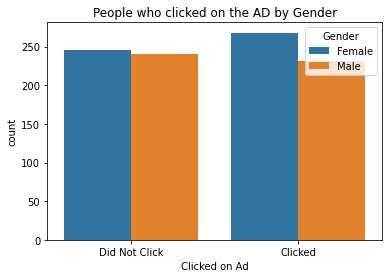

In [97]:
## Visualization

sns.countplot(data = df, x = "Clicked on Ad", hue = "Gender")
plt.title('People who clicked on the AD by Gender')

Text(0.5, 1.0, 'People who clicked on the AD by Age Group')

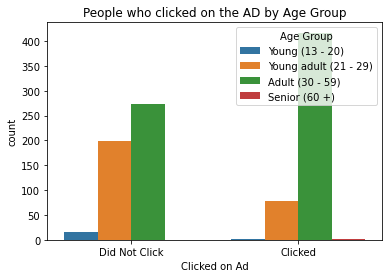

In [98]:
sns.countplot(data = df, x = "Clicked on Ad", hue = "Age Group")
plt.title('People who clicked on the AD by Age Group')

Text(0.5, 1.0, 'People who clicked group by their income')

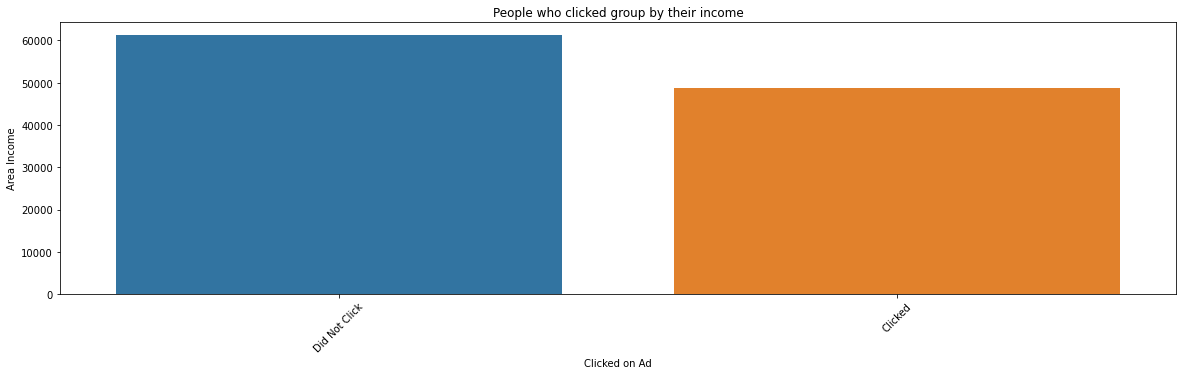

In [99]:
plt.figure(figsize=(20,5))

sns.barplot(data = df, x = "Clicked on Ad", y = "Area Income", ci = None)

plt.xticks(rotation = 45)
plt.title('People who clicked group by their income')

Text(0.5, 1.0, 'People who clicked group by their Age')

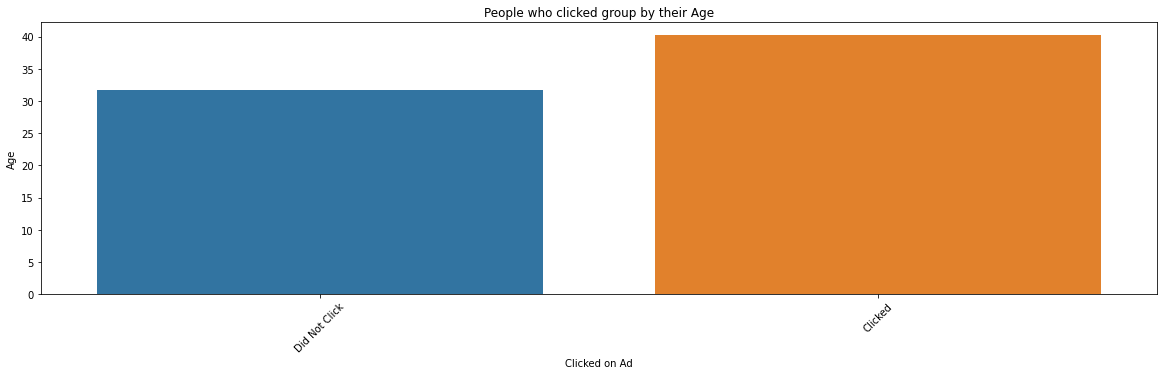

In [100]:
plt.figure(figsize=(20,5))

sns.barplot(data = df, x = "Clicked on Ad", y = "Age", ci = None)

plt.xticks(rotation = 45)
plt.title('People who clicked group by their Age')

Text(0.5, 1.0, 'Daily Time Uses by Age Group Statistic')

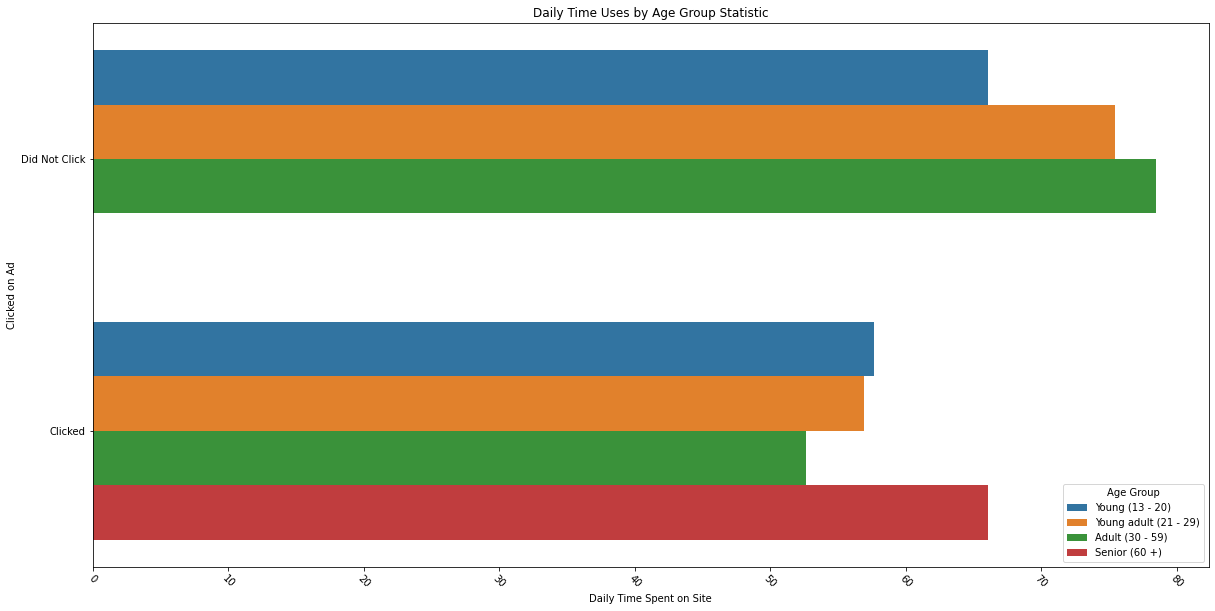

In [101]:
plt.figure(figsize=(20,10))

sns.barplot(data = df, x = "Daily Time Spent on Site", y = "Clicked on Ad", hue = "Age Group", ci = None)

plt.xticks(rotation = -45)
plt.title('Daily Time Uses by Age Group Statistic')

Text(0.5, 1.0, 'Daily Time Uses by Gender Statistic')

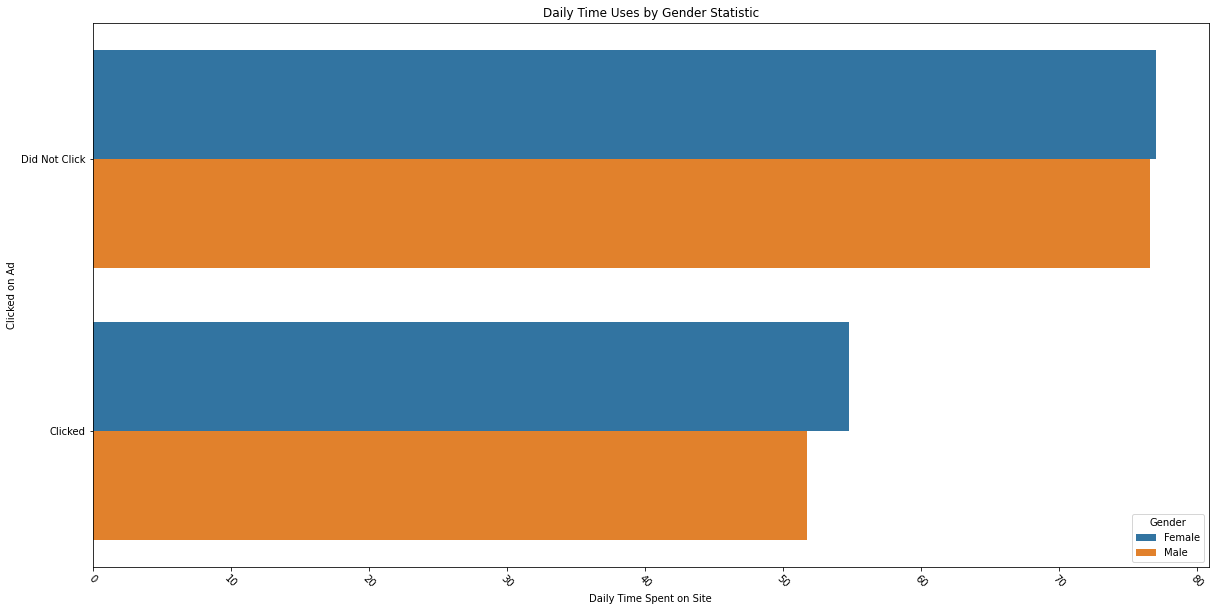

In [102]:
plt.figure(figsize=(20,10))

sns.barplot(data = df, x = "Daily Time Spent on Site", y = "Clicked on Ad", hue = "Gender", ci = None)

plt.xticks(rotation = -45)
plt.title('Daily Time Uses by Gender Statistic')